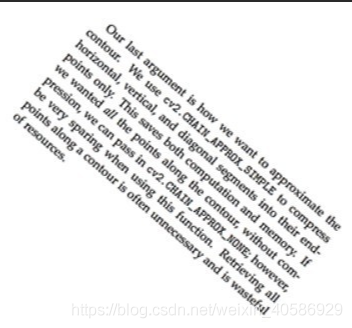

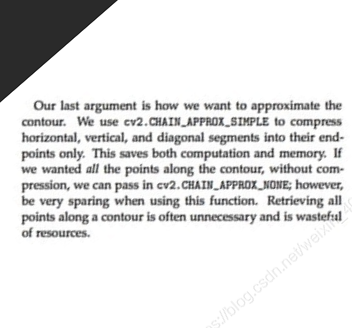

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('houghtest.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 100, minLineLength=1, maxLineGap=100)#為甚麼用HoughLineP因為它為Hough的優化 第二個參數為rho pi/180為了找出所有的角度
slopes = []

for line in lines:
    x1, y1, x2, y2 = line[0]
    slope = (y2 - y1) / (x2 - x1)
    slopes.append(slope)


# Calculate the median slope
median_slope = np.median(slopes) #找最大透過中位數
angle = np.arctan(median_slope) * 180 / np.pi
height, width = img.shape[:2]
center = (width / 2, height / 2)
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(img, M, (width, height), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

cv2_imshow(img)
cv2_imshow(rotated)


https://blog.csdn.net/ftimes/article/details/106816736

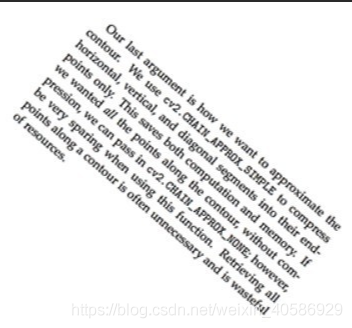

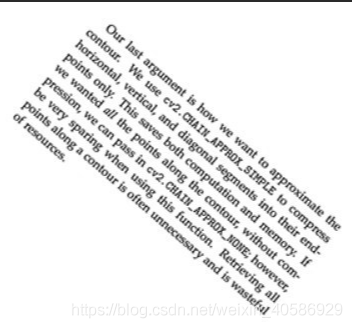

ZeroDivisionError: ignored

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# 定义RULER算法函数
def ruler(img, l=50, r=700, angle_thresh=5):
    # 将图像转换为灰度图
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    # Canny边缘检测
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    # Hough直线变换
    lines = cv2.HoughLines(edges, 1, np.pi / 180, l)

    # 提取直线的斜率
    slopes = []
    for line in lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a*rho, b*rho
        x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
        x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
        slope = (y2-y1) / (x2-x1)
        slopes.append(slope)

    # 使用傅立叶变换寻找斜率的众数
    n = len(slopes)
    x = np.arange(n)
    y = np.array(slopes)
    fy = np.fft.fft(y)
    freqs = np.fft.fftfreq(n, 1/n)
    index = np.argmax(np.abs(fy))
    slope_mode = freqs[index] if index > 0 else 0

    # 计算需要旋转的角度
    angle = np.arctan(slope_mode) * 180 / np.pi

    # 如果旋转角度超过阈值，则认为图像不是水平的
    if np.abs(angle) > angle_thresh:
        rows, cols = img.shape[:2]
        M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)
        img = cv2.warpAffine(img, M, (cols, rows))

    return img

# 测试代码
if __name__ == '__main__':
    # 读取图像
    img = cv2.imread('houghtest.png')
    cv2_imshow(img)
    # 使用RULER算法校正图像
    img_corrected = ruler(img)

    # 显示结果
    cv2_imshow(img)
    cv2_imshow(img_corrected)
    cv2.waitKey(0)
    cv2.destroyAllWindows()